# Imports

In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# Variables

In [41]:
direct = os.getcwd()
train_name = 'train_loan_data.csv'
test_name = 'test_loan_data.csv'

# Functions

In [42]:
def data_grab_local(base, name):
    f = os.path.join(base, name)
    df = pd.read_csv(f)
    return df

***

In [43]:
# grab data
train = data_grab_local(direct, train_name)
test = data_grab_local(direct, test_name)

***
***
# Clean Data

In [44]:
#info on data I will impute
miss_train = train.apply(lambda x: sum(x.isnull()), axis=0)
miss_train = pd.Series(miss_train, name='Train')
miss_test = test.apply(lambda x: sum(x.isnull()), axis=0)
miss_test = pd.Series(miss_test, name='Test')

missing = pd.concat([miss_train, miss_test], axis=1)
missing.replace(np.nan, 0,inplace=True)
missing['Total'] = missing['Test'] + missing['Train']
missing.drop(['Train', 'Test'], axis=1, inplace=True)
missing = missing.loc[missing['Total'] > 0]
missing.sort_values(by='Total', ascending = False, inplace=True)
missing

C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


Total
Credit_History     79.0
Self_Employed      55.0
LoanAmount         27.0
Dependents         25.0
Gender             24.0
Loan_Amount_Term   20.0
Married             3.0

## Gender

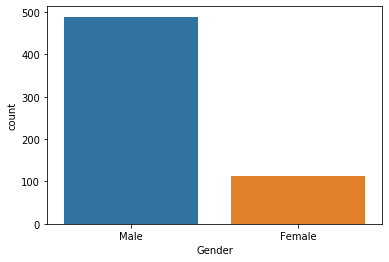

In [45]:
sns.countplot(train['Gender'])

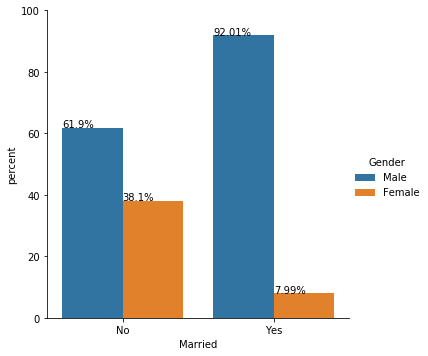

In [46]:
x,y = 'Married', 'Gender'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

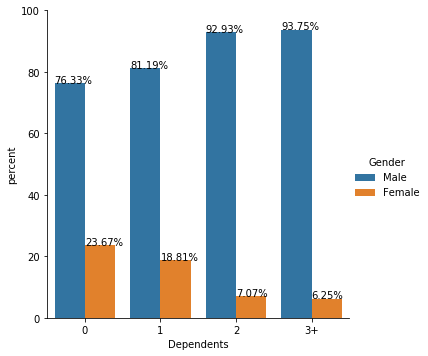

In [47]:
x,y = 'Dependents', 'Gender'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

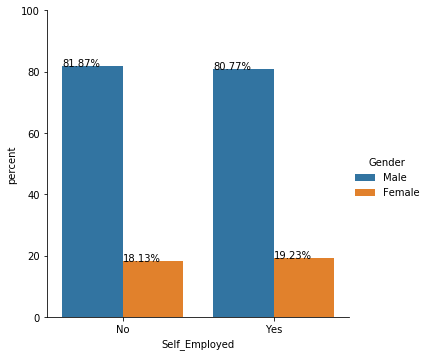

In [48]:
x,y = 'Self_Employed', 'Gender'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


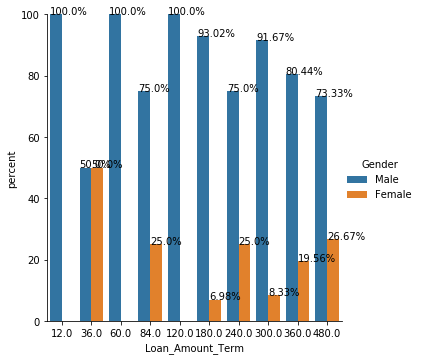

In [49]:
x,y = 'Loan_Amount_Term', 'Gender'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

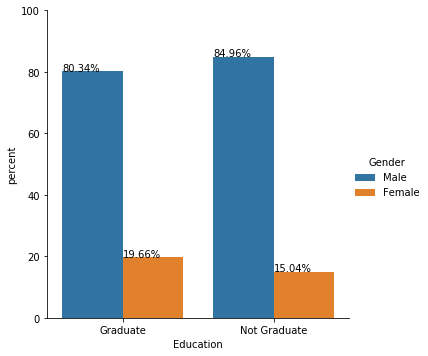

In [50]:
x,y = 'Education', 'Gender'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

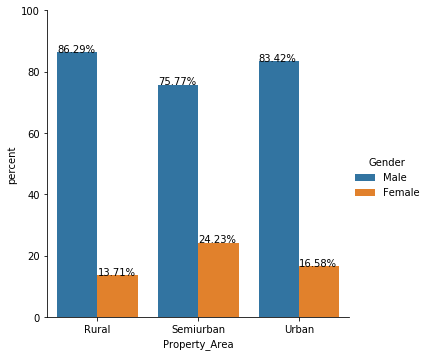

In [51]:
x,y = 'Property_Area', 'Gender'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [52]:
data = train.groupby(['Married', 'Dependents', 'Gender'])['ApplicantIncome'].count().unstack()
data.replace(np.nan, 0,inplace=True)
data['Total'] = data['Female'] + data['Male']
data['P(Male)'] = data['Male'] / data['Total']
data['MF'] = data['P(Male)'].apply(lambda x: 'Male' if x >= 0.5 else 'Female')
data

Gender              Female   Male  Total   P(Male)      MF
Married Dependents                                        
No      0             60.0  109.0  169.0  0.644970    Male
        1             13.0   10.0   23.0  0.434783  Female
        2              2.0    6.0    8.0  0.750000    Male
        3+             3.0    3.0    6.0  0.500000    Male
Yes     0             20.0  149.0  169.0  0.881657    Male
        1              6.0   72.0   78.0  0.923077    Male
        2              5.0   86.0   91.0  0.945055    Male
        3+             0.0   42.0   42.0  1.000000    Male

## Married

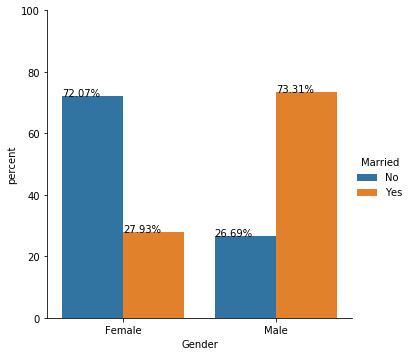

In [53]:
x,y = 'Gender', 'Married'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

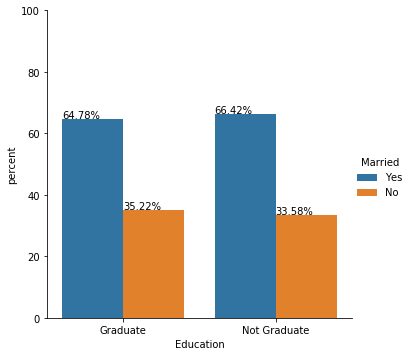

In [54]:
x,y = 'Education', 'Married'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

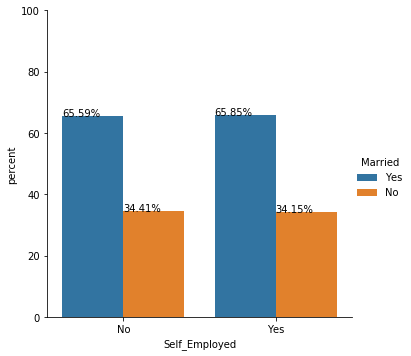

In [55]:
x,y = 'Self_Employed', 'Married'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

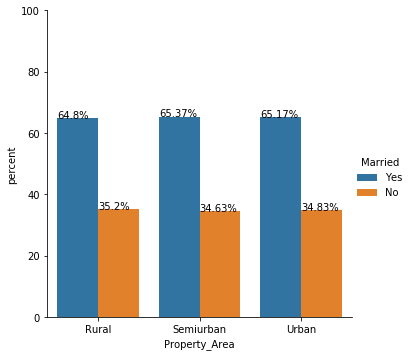

In [56]:
x,y = 'Property_Area', 'Married'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

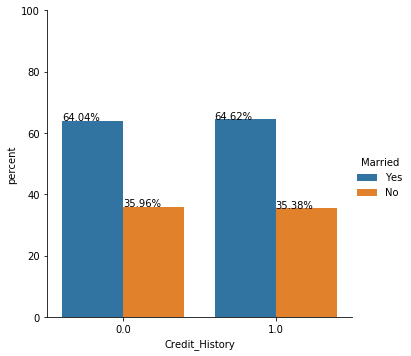

In [57]:
x,y = 'Credit_History', 'Married'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [58]:
data = train.groupby(['Gender', 'Married'])['ApplicantIncome'].count().unstack()
data['Total'] = data['Yes'] + data['No']
data['P(Married)'] = data['Yes'] / data['Total']
data['M'] = data['P(Married)'].apply(lambda x: 'Married' if x >= 0.5 else 'Not Married')

data

Married   No  Yes  Total  P(Married)            M
Gender                                           
Female    80   31    111    0.279279  Not Married
Male     130  357    487    0.733060      Married

## Dependents

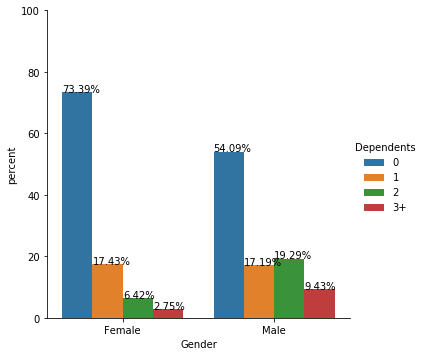

In [59]:
x,y = 'Gender', 'Dependents'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

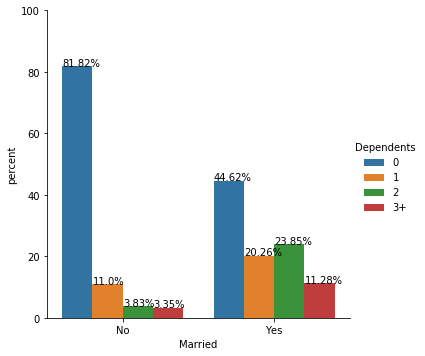

In [60]:
x,y = 'Married', 'Dependents'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

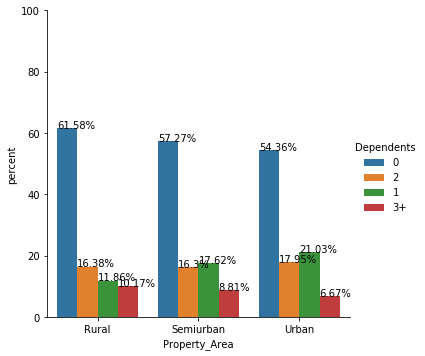

In [61]:
x,y = 'Property_Area', 'Dependents'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

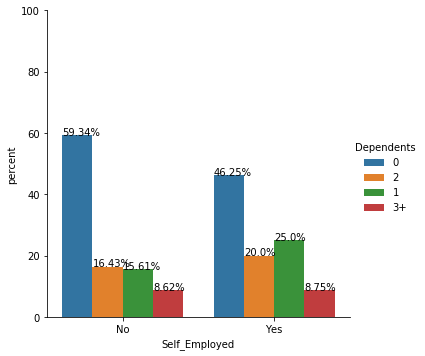

In [62]:
x,y = 'Self_Employed', 'Dependents'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [63]:
data = train.groupby(['Married', 'Property_Area', 'Dependents'])['ApplicantIncome'].count().unstack()
data.replace(np.nan, 0, inplace=True)
data['Total'] = data['0'] + data['1'] + data['2'] + data['3+']
data['P(0)'] = data['0'] / data['Total']
data['P(1)'] = data['1'] / data['Total']
data['P(2)'] = data['2'] / data['Total']
data['P(3+)'] = data['3+'] / data['Total']
#data['M'] = data['P(Married)'].apply(lambda x: 'Married' if x >= 0.5 else 'Not Married')

data

Dependents              0   1   2  3+  Total      P(0)      P(1)      P(2)  \
Married Property_Area                                                        
No      Rural          53   3   4   3     63  0.841270  0.047619  0.063492   
        Semiurban      62  12   3   2     79  0.784810  0.151899  0.037975   
        Urban          56   8   1   2     67  0.835821  0.119403  0.014925   
Yes     Rural          56  18  25  15    114  0.491228  0.157895  0.219298   
        Semiurban      68  28  34  18    148  0.459459  0.189189  0.229730   
        Urban          50  33  34  11    128  0.390625  0.257812  0.265625   

Dependents                P(3+)  
Married Property_Area            
No      Rural          0.047619  
        Semiurban      0.025316  
        Urban          0.029851  
Yes     Rural          0.131579  
        Semiurban      0.121622  
        Urban          0.085938

In [64]:
def dependents_to_int(x):
    if pd.isnull(x):
        return np.nan
    elif x == '3+':
        return 3
    else:
        return int(x)

train['Depends'] = train['Dependents'].apply(lambda x: dependents_to_int(x))

In [65]:
data = train.groupby(['Married', 'Gender'])['Depends'].mean()
data

Married  Gender
No       Female    0.333333
         Male      0.242188
Yes      Female    0.516129
         Male      1.060172
Name: Depends, dtype: float64

## Self Employed

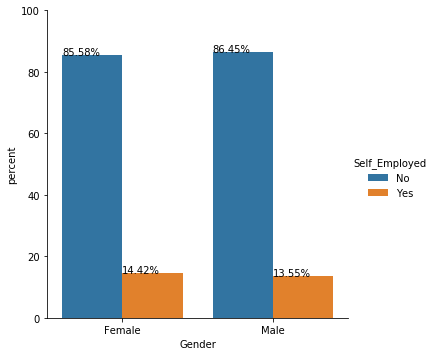

In [66]:
x,y = 'Gender', 'Self_Employed'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

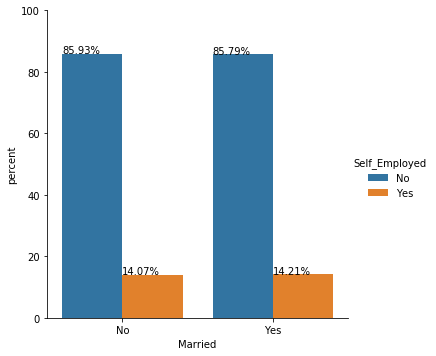

In [67]:
x,y = 'Married', 'Self_Employed'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

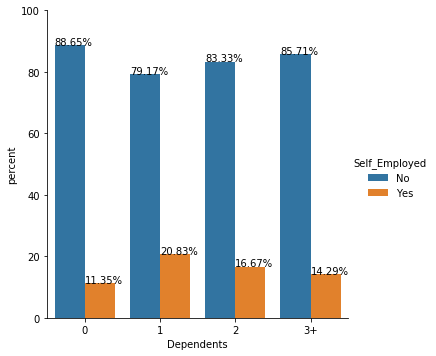

In [68]:
x,y = 'Dependents', 'Self_Employed'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

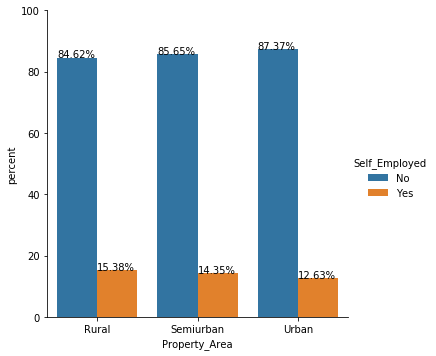

In [69]:
x,y = 'Property_Area', 'Self_Employed'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [70]:
train.groupby(['Self_Employed'])['ApplicantIncome'].mean()

Self_Employed
No     5049.748000
Yes    7380.817073
Name: ApplicantIncome, dtype: float64

In [71]:
train['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

## LoanAmount

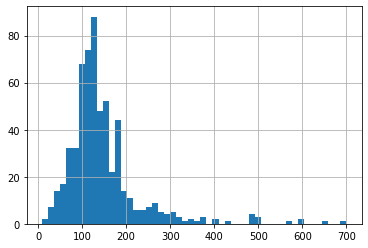

In [72]:
train['LoanAmount'].hist(bins=50)

In [73]:
data = train['LoanAmount']
data.dropna(inplace=True)

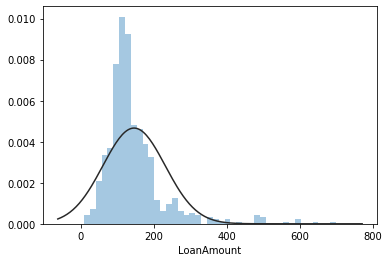

In [74]:
sns.distplot(data, kde=False, fit=stats.norm)

In [75]:
train['LoanAmountLog'] = np.log(train['LoanAmount'].astype('float64'))
train

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  Depends  LoanAmountLog  
0               1.0         Urban           Y      0.0            NaN  
1               1.0         Rural           N      1.0       4.852030  
2               1.0         Urban           Y      0.0       4.189655  
3               1.0         Urban           Y      0.0       4.787492  
4               1.0         Urban           Y      0.0       4.948760  
..              ...           ...         ...      ...            ...  
609             1.0         Rural           Y      0.0       4.262680  
610             1.0         Rural           Y      3.0       3.688879  
611             1.0         Urban           Y      1.0       5.533389  
612             1.0         Urban           Y      2.0       5.231109  
613             0.0     Semiurban           N      0.0       4.890349  

[614 rows x 15 columns]

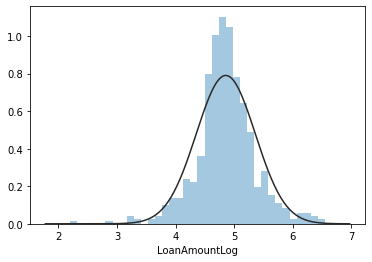

In [76]:
data = train['LoanAmountLog']
data.dropna(inplace=True)
sns.distplot(data, kde=False, fit=stats.norm)

In [77]:
mu = data.mean()
mu

4.857444178729353

In [78]:
np.exp(mu)

128.69486035580871

In [79]:
train['LoanAmount'].mean()

146.41216216216216

## Loan Amount Term

In [80]:
def loanClass(x):
    if np.isnan(x):
        return np.nan
    else:
        x = int(x)
        if x == 360:
            return '30'
        elif x == 180:
            return '15'
        elif x < 180:
            return '<15'
        elif x > 180 and x < 360:
            return '(15, 30)'
        elif x > 360:
            return '>30'
        else:
            return '??'

In [81]:
train['LoanTerm'] = train['Loan_Amount_Term'].apply(lambda x: loanClass(x))

In [82]:
train['LoanTerm'].value_counts(normalize=True)

30          0.853333
15          0.073333
(15, 30)    0.028333
>30         0.025000
<15         0.020000
Name: LoanTerm, dtype: float64

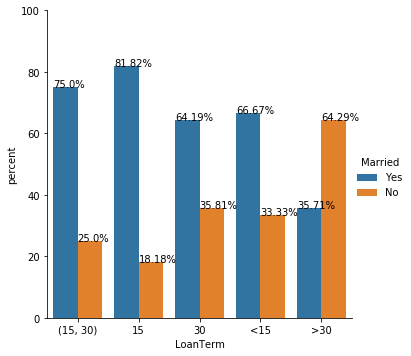

In [83]:
x,y = 'LoanTerm', 'Married'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

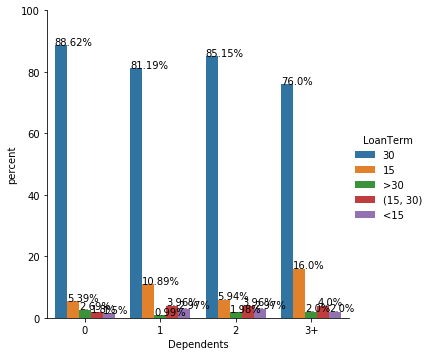

In [84]:
x,y = 'Dependents', 'LoanTerm'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

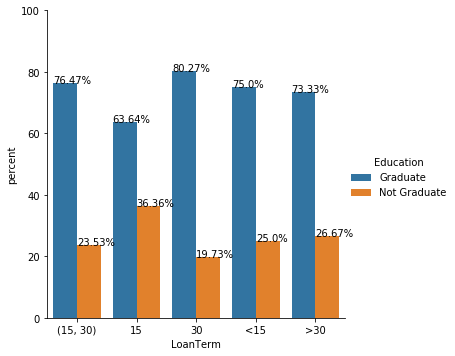

In [85]:
x,y = 'LoanTerm', 'Education'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

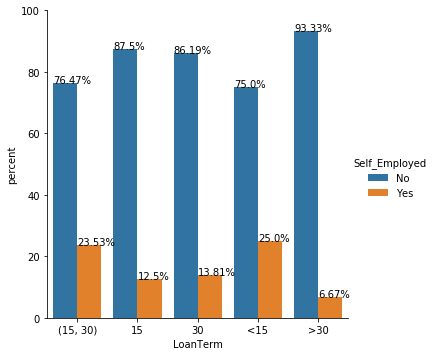

In [86]:
x,y = 'LoanTerm', 'Self_Employed'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


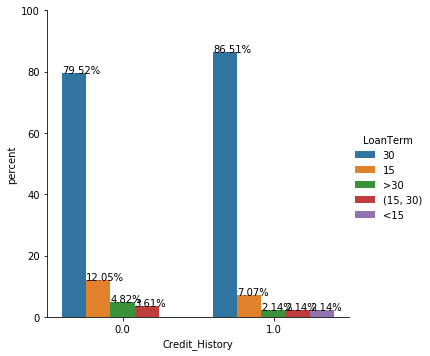

In [87]:
x,y = 'Credit_History', 'LoanTerm'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

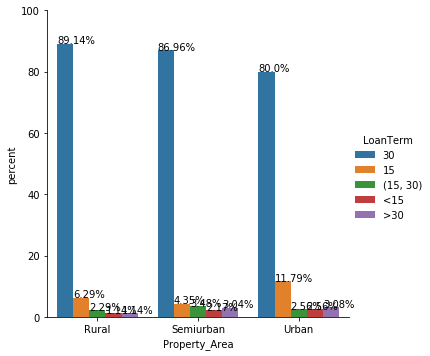

In [88]:
x,y = 'Property_Area', 'LoanTerm'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [89]:
urb = train.loc[train['Property_Area'] == 'Urban']

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


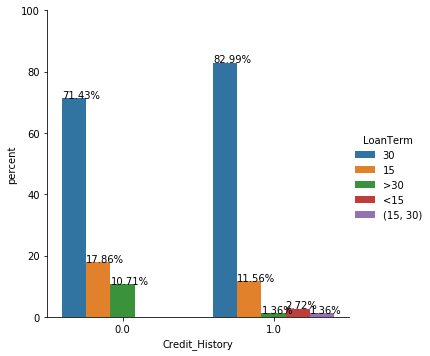

In [90]:
x,y = 'Credit_History', 'LoanTerm'

df1 = urb.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [91]:
no_cred = urb.loc[urb['Credit_History'] == 0.0]

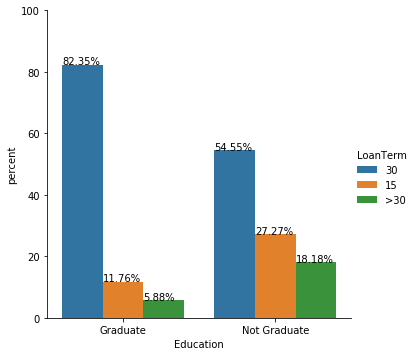

In [92]:
x,y = 'Education', 'LoanTerm'

df1 = no_cred.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [93]:
#if missing replace with most likely loan term of 30 years
#create groups of loans
def loan_group(x):
    if np.isnan(x):
        return '30'
    else:
        x = int(x)
        if x == 360:
            return '30'
        elif x == 180:
            return '15'
        elif x < 180:
            return '<15'
        elif x > 180 and x < 360:
            return '(15, 30)'
        elif x > 360:
            return '>30'
        else:
            return '??'
        
def loan_ordinal(x):
    if np.isnan(x):
        return 360.0
    else:
        return float(x)
    
    
def loan_term_clean(df):
    df['LoanGroups'] = df['Loan_Amount_Term'].apply(lambda x: loan_group(x))
    df['LoanTerm'] = df['Loan_Amount_Term'].apply(lambda x: loan_ordinal(x))
    #df.drop(columns = ['Loan_Amount_Term'], inplace = True)
    return df

In [94]:
train = loan_term_clean(train)

In [95]:
#train['LoanGroups'] = train['LoanTerm'].apply(lambda x: loanClass(x))
train['LoanAmountLog'] = np.log(train['LoanAmount'].astype('float64'))
print(train.head(15))
group = train.groupby(['LoanGroups'])['LoanAmountLog']
train['LoanAmountLog'] = group.transform(lambda x: x.fillna(x.mean()))
print(train.head(15))

     Loan_ID Gender Married Dependents     Education Self_Employed  \
0   LP001002   Male      No          0      Graduate            No   
1   LP001003   Male     Yes          1      Graduate            No   
2   LP001005   Male     Yes          0      Graduate           Yes   
3   LP001006   Male     Yes          0  Not Graduate            No   
4   LP001008   Male      No          0      Graduate            No   
5   LP001011   Male     Yes          2      Graduate           Yes   
6   LP001013   Male     Yes          0  Not Graduate            No   
7   LP001014   Male     Yes         3+      Graduate            No   
8   LP001018   Male     Yes          2      Graduate            No   
9   LP001020   Male     Yes          1      Graduate            No   
10  LP001024   Male     Yes          2      Graduate            No   
11  LP001027   Male     Yes          2      Graduate           NaN   
12  LP001028   Male     Yes          2      Graduate            No   
13  LP001029   Male 

In [96]:
train.drop(columns=['LoanAmount'], inplace=True)
train['LoanAmount'] = train['LoanAmountLog'].apply(lambda x: np.exp(x))
train.head(15)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0   LP001002   Male      No          0      Graduate            No   
1   LP001003   Male     Yes          1      Graduate            No   
2   LP001005   Male     Yes          0      Graduate           Yes   
3   LP001006   Male     Yes          0  Not Graduate            No   
4   LP001008   Male      No          0      Graduate            No   
5   LP001011   Male     Yes          2      Graduate           Yes   
6   LP001013   Male     Yes          0  Not Graduate            No   
7   LP001014   Male     Yes         3+      Graduate            No   
8   LP001018   Male     Yes          2      Graduate            No   
9   LP001020   Male     Yes          1      Graduate            No   
10  LP001024   Male     Yes          2      Graduate            No   
11  LP001027   Male     Yes          2      Graduate           NaN   
12  LP001028   Male     Yes          2      Graduate            No   
13  LP001029   Male      No          0      Graduate            No   
14  LP001030   Male     Yes          2      Graduate            No   

    ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
0              5849                0.0             360.0             1.0   
1              4583             1508.0             360.0             1.0   
2              3000                0.0             360.0             1.0   
3              2583             2358.0             360.0             1.0   
4              6000                0.0             360.0             1.0   
5              5417             4196.0             360.0             1.0   
6              2333             1516.0             360.0             1.0   
7              3036             2504.0             360.0             0.0   
8              4006             1526.0             360.0             1.0   
9             12841            10968.0             360.0             1.0   
10             3200              700.0             360.0             1.0   
11             2500             1840.0             360.0             1.0   
12             3073             8106.0             360.0             1.0   
13             1853             2840.0             360.0             1.0   
14             1299             1086.0             120.0             1.0   

   Property_Area Loan_Status  Depends  LoanAmountLog  LoanTerm LoanGroups  \
0          Urban           Y      0.0       4.872187     360.0         30   
1          Rural           N      1.0       4.852030     360.0         30   
2          Urban           Y      0.0       4.189655     360.0         30   
3          Urban           Y      0.0       4.787492     360.0         30   
4          Urban           Y      0.0       4.948760     360.0         30   
5          Urban           Y      2.0       5.587249     360.0         30   
6          Urban           Y      0.0       4.553877     360.0         30   
7      Semiurban           N      3.0       5.062595     360.0         30   
8          Urban           Y      2.0       5.123964     360.0         30   
9      Semiurban           N      1.0       5.855072     360.0         30   
10         Urban           Y      2.0       4.248495     360.0         30   
11         Urban           Y      2.0       4.691348     360.0         30   
12         Urban           Y      2.0       5.298317     360.0         30   
13         Rural           N      0.0       4.736198     360.0         30   
14         Urban           Y      2.0       2.833213     120.0        <15   

    LoanAmount  
0   130.606229  
1   128.000000  
2    66.000000  
3   120.000000  
4   141.000000  
5   267.000000  
6    95.000000  
7   158.000000  
8   168.000000  
9   349.000000  
10   70.000000  
11  109.000000  
12  200.000000  
13  114.000000  
14   17.000000

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Depends              599 non-null float64
LoanAmountLog        614 non-null float64
LoanTerm             614 non-null float64
LoanGroups           614 non-null object
LoanAmount           614 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 81.7+ KB


## Credit History

In [98]:
train['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

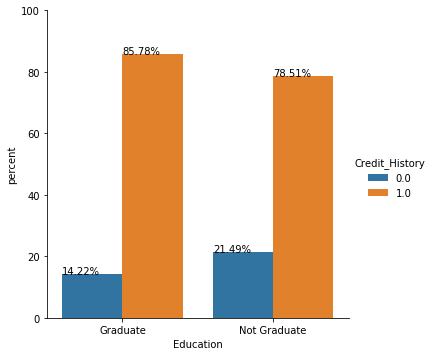

In [99]:
x,y = 'Education', 'Credit_History'

df1 = train.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [100]:
noEd = train.loc[train['Education'] == 'Not Graduate']


In [101]:
def counts(df, x, y):
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

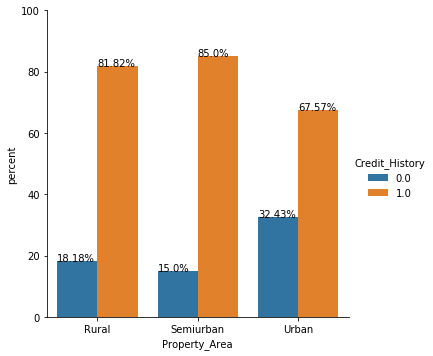

In [102]:
counts(noEd, 'Property_Area', 'Credit_History')

In [103]:
noEdUrban = noEd.loc[noEd['Property_Area'] == 'Urban']

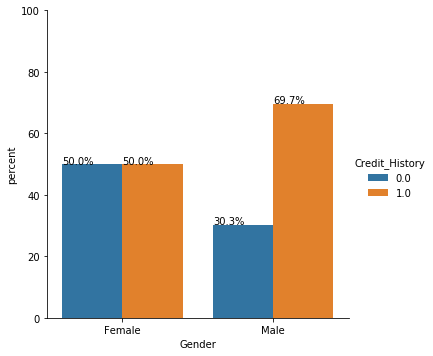

In [104]:
counts(noEdUrban, 'Gender', 'Credit_History')

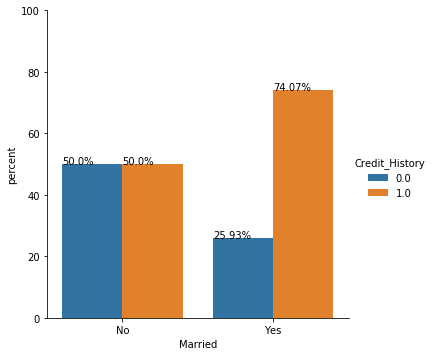

In [105]:
counts(noEdUrban, 'Married', 'Credit_History')

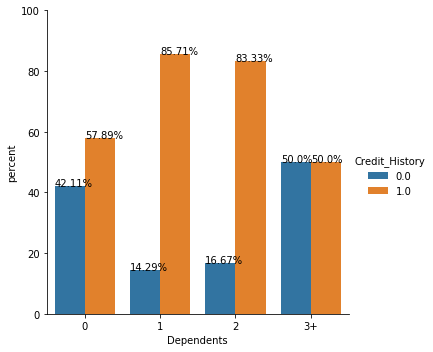

In [106]:
counts(noEdUrban, 'Dependents', 'Credit_History')

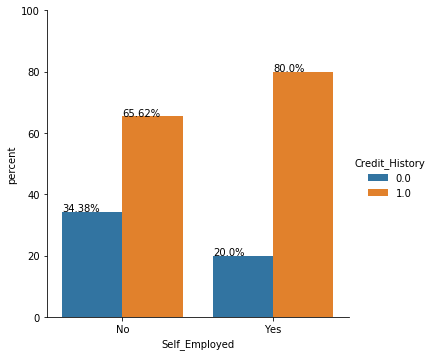

In [107]:
counts(noEdUrban, 'Self_Employed', 'Credit_History')

In [108]:
noEdUrban['FamilyIncome'] = noEdUrban['ApplicantIncome'] = noEdUrban['CoapplicantIncome']
x,y = 'Credit_History', 'Loan_Amount_Term'

df1 = noEdUrban.groupby(x)[y].mean()
df1

C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Credit_History
0.0    332.727273
1.0    292.173913
Name: Loan_Amount_Term, dtype: float64

In [109]:
train['FamilyIncome'] = train['ApplicantIncome'] = train['CoapplicantIncome']
x,y = 'Credit_History', 'FamilyIncome'

df1 = train.groupby(x)[y].mean()
df1

Credit_History
0.0    1542.179775
1.0    1528.250358
Name: FamilyIncome, dtype: float64

In [110]:
data = train.groupby(['Education', 'Property_Area', 'Credit_History'])['ApplicantIncome'].count().unstack()
print(data)
data['Total'] = data[0.0] + data[1.0]
data['P(No Hist)'] = data[0.0] / data['Total']
#data['M'] = data['P(Married)'].apply(lambda x: 'Married' if x >= 0.5 else 'Not Married')

data

Credit_History              0.0  1.0
Education    Property_Area          
Graduate     Rural           20  101
             Semiurban       24  153
             Urban           19  126
Not Graduate Rural            8   36
             Semiurban        6   34
             Urban           12   25


Credit_History              0.0  1.0  Total  P(No Hist)
Education    Property_Area                             
Graduate     Rural           20  101    121    0.165289
             Semiurban       24  153    177    0.135593
             Urban           19  126    145    0.131034
Not Graduate Rural            8   36     44    0.181818
             Semiurban        6   34     40    0.150000
             Urban           12   25     37    0.324324